In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from proj1_helpers import *
from implementations import *
from annexe import *
import seaborn as sns

In [2]:
train_set = load_csv_data('/Users/bedanian/Desktop/Machine Learning/Project 1/train.csv', sub_sample = True)
test_set = load_csv_data('/Users/bedanian/Desktop/Machine Learning/Project 1/test.csv', sub_sample = False)

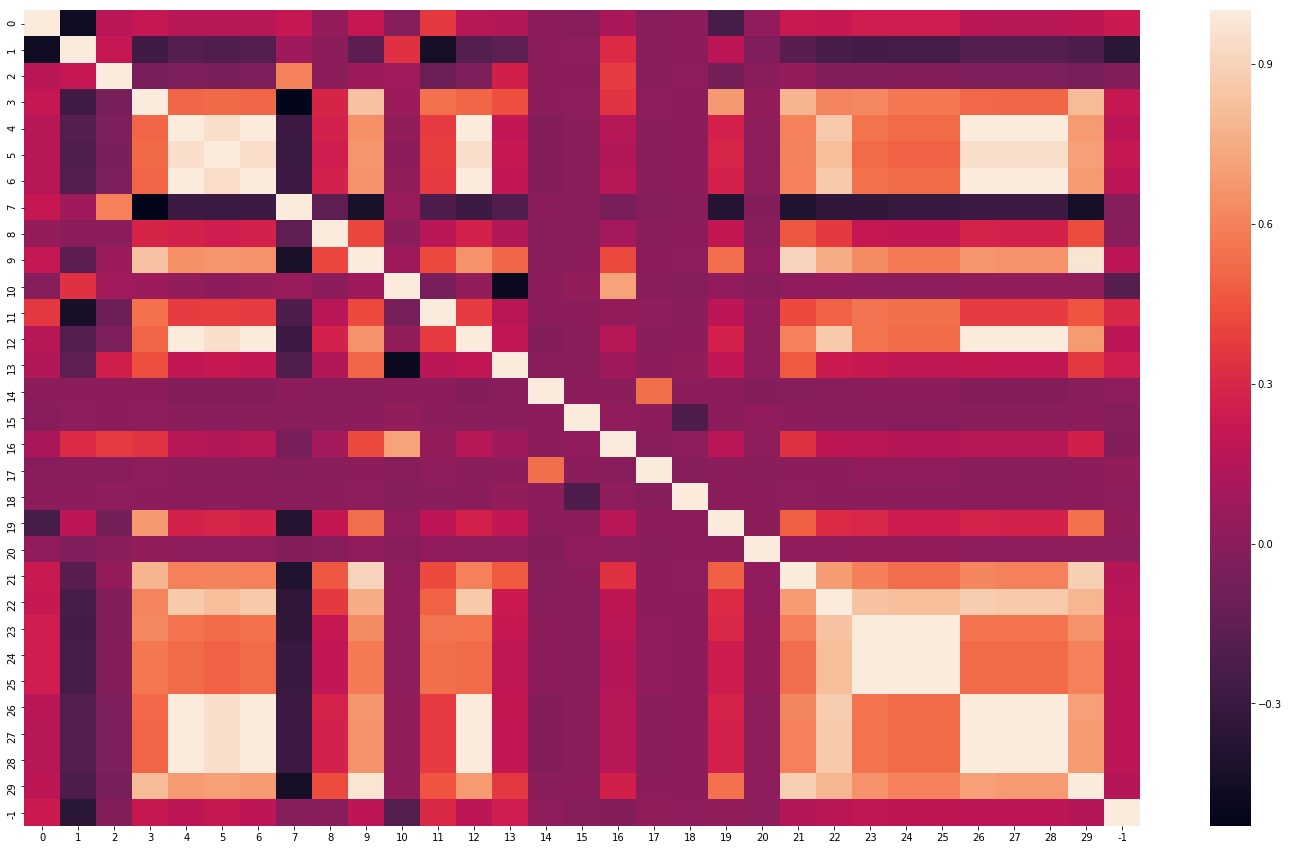

In [3]:
# calculate the correlation matrix
x_train = train_set[1]
y_train = train_set[0]
df = pd.DataFrame(x_train)
df[-1] = y_train
corr = df.corr()
#plot the heatmap
f = plt.figure(1, figsize = (25, 15))
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns)
f.savefig("heatmap.pdf", bbox_inches='tight')

In [4]:
# print column 22
print(df[22].drop_duplicates())

0     2.0
1     1.0
6     0.0
37    3.0
Name: 22, dtype: float64


In [5]:
def visualization(lambda_list, mse_train, mse_test,d):
    plt.semilogx(lambda_list, mse_train, marker=".", color='b', label='train error')
    plt.semilogx(lambda_list, mse_test, marker=".", color='r', label='test error')
    plt.xlabel("lambda")
    plt.ylabel("RMSE")
    plt.title("Cross Validation for subset " + str(d))
    plt.legend()
    plt.grid()

def cross_validation(y_t,x_t,lower,upper,degree,nb,i):
    (x_train, x_test, y_train, y_test) = split_data(x_t, y_t, ratio = 0.8, seed = 1)
    x_train = build_poly(x_train, degree)
    x_test = build_poly(x_test, degree)
    lambda_list = np.logspace(lower, upper, nb)
    rmse_train = []
    rmse_test = []
    for lbd in lambda_list:
        w = ridge_regression(y_train, x_train, lbd)[0]
        loss_train = 2*MSE(y_train, x_train, w)
        loss_test = 2*MSE(y_test, x_test, w)
        rmse_train.append(np.sqrt(loss_train))
        rmse_test.append(np.sqrt(loss_test))
    visualization(lambda_list, rmse_train, rmse_test,i)
    return [min(rmse_test),lambda_list[np.argmin(rmse_test)]]

In [6]:
#split train dataset
(y_train_0,x_train_0,id_train_0) = split(train_set, 0,22)
(y_train_1,x_train_1,id_train_1) = split(train_set, 1,22)
(y_train_2,x_train_2,id_train_2) = split(train_set, 2,22)
(y_train_3,x_train_3,id_train_3) = split(train_set, 3,22)

#delete column 22
x_train_0 = np.delete(x_train_0, [22] , axis = 1)
x_train_1 = np.delete(x_train_1, [22] , axis = 1)
x_train_2 = np.delete(x_train_2, [22] , axis = 1)
x_train_3 = np.delete(x_train_3, [22] , axis = 1)

#clean column of nan
nan_0 = get_na_columns(x_train_0, 0.90, -999)
x_train_0 = np.delete(x_train_0, nan_0 , axis = 1)
nan_1 = get_na_columns(x_train_1, 0.90, -999)
x_train_1 = np.delete(x_train_1, nan_1 , axis = 1)
nan_2 = get_na_columns(x_train_2, 0.90, -999)
x_train_2 = np.delete(x_train_2, nan_2, axis = 1)
nan_3 = get_na_columns(x_train_3, 0.90, -999)
x_train_3 = np.delete(x_train_3, nan_3, axis = 1)

#cleaning last nan
x_train_0 = replace_mean(x_train_0)
x_train_1 = replace_mean(x_train_1)
x_train_2 = replace_mean(x_train_2)
x_train_3 = replace_mean(x_train_3)

#remove column 18
x_train_0 = np.delete(x_train_0, [18] , axis = 1)

#standardize
(x_train_0,_) = standardize(x_train_0,x_train_0)
(x_train_1,_) = standardize(x_train_1,x_train_1)
(x_train_2,_) = standardize(x_train_2,x_train_2)
(x_train_3,_) = standardize(x_train_3,x_train_3)

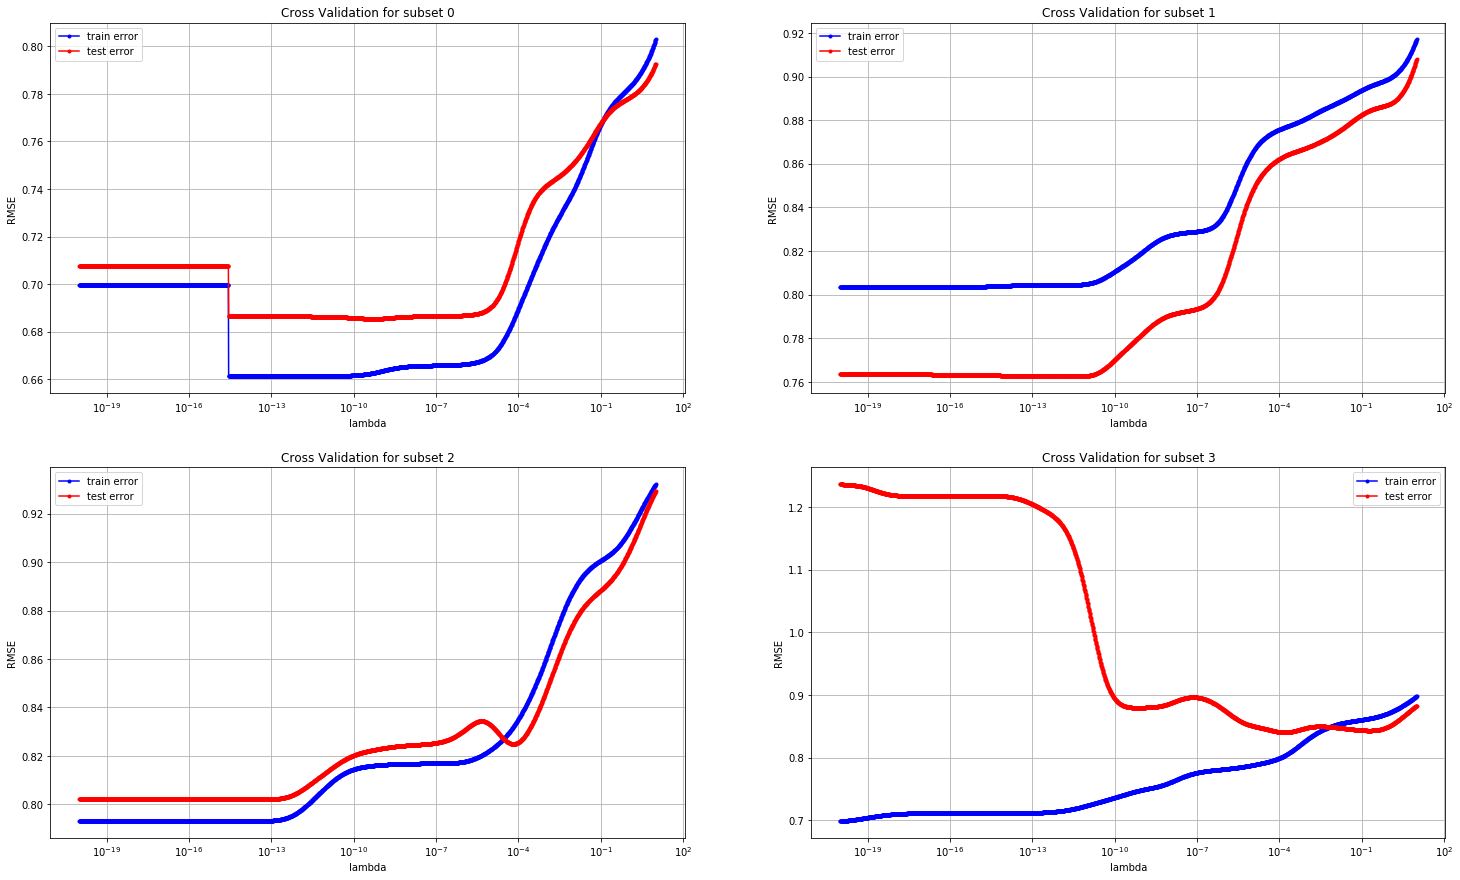

In [8]:
#Cross validation
g = plt.figure(1, figsize = (25, 15))
plt.subplot(2,2,1)
a = cross_validation(y_train_0,x_train_0,-20,1,2,2000,0)
plt.subplot(2,2,2)
b = cross_validation(y_train_1,x_train_1,-20,1,2,2000,1)
plt.subplot(2,2,3)
c = cross_validation(y_train_2,x_train_2,-20,1,2,2000,2)
plt.subplot(2,2,4)
d = cross_validation(y_train_3,x_train_3,-20,1,3,2000,3)
g.savefig("cv.pdf", bbox_inches='tight')

In [12]:
(l0,d0) = [5.228284110711695e-10, 2]
(l1,d1) = [4.691758698326445e-12, 2]
(l2,d2) = [4.210291410564796e-14, 2]
(l3,d3) = [0.00015581034821123352, 3]